<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-talk')

from matplotlib import rcParams
# rcParams['figure.figsize'] = 15,7
plt.rc('figure', figsize=(12,7) )         # Image size

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 10 )

plt.rc('figure', figsize=(10,5) )         # Image size

In [3]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

# Data

In [56]:
## Let's first set how many sample our data has.
n_s=10000

## Now we generate some data with two features (ns, 2)
n_f=2
X = np.random.uniform(-1,1, [n_s, n_f])

W = np.random.uniform(-1,1, 2)
Y = np.dot(X,W)
## Y = w1 * X1 + w2 * X2


## Now we make the loss manifold. 

##We use the L2 loss for this section.
def l2_loss(y,a):
    return np.sum( (y-a)**2 )/2/len(y)

## Next we generate n_points random guess for the weights
## that we plan to calculate the loss for to get a sense of 
## sense of the loss manifold. 

n_points = 1000
w_list = np.random.uniform(-2,2, [2, n_points])

Y_predicted = np.dot( X ,  w_list )

loss_list = np.array([l2_loss(y, Y) for y in Y_predicted.T ])

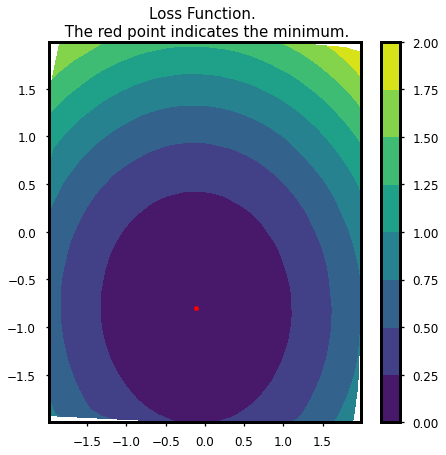

In [57]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list
                    #  , levels=[.001, .01, .1, .2, .3, .4, .5, .7, 1, 1.5, 2]
                     )
ax1.scatter(W[0], W[1], color='r', s=20)
plt.colorbar(p1, ax=ax1)

plt.show()

# Optimization

In [58]:
##Paramters
w_init = [1.5, 1.5]
n_itr0 = 10
eta0 = 1

## Simple GD

In [13]:
def GD_optimizer(X, Y, eta=.3, n_itr = 1000, warm_start = False):
    n_s = len(Y)
    ## We start with a random point or from the warm start.
    if warm_start==False:
      w = np.random.uniform(-2,2,2)
    else:
      w = warm_start

    print(f'The initial values of w are {w}.\n')
    w_hist = [w]
   
    for i in range(n_itr):
      ## Determine the gradient. This is how much we would need to move. 
      ## This is determined based on the derivative of the loss function. 
        # dw = np.dot( X.T , ( np.dot(X,w) - Y)   )/n_s
        dw = (X@w - Y) @ X /n_s

        ## Update w
        w = w - eta*dw
        
        w_hist += [w]

    print(f'The final values of w are {np.round(w,3)}.\n')
    return w, np.array(w_hist)

Question: How would we change the above function if we were using MAE instead of MSE?



In [14]:
w_gd, hist_gd = GD_optimizer(X,Y, eta=eta0, n_itr=n_itr0, warm_start=w_init)

The initial values of w are [1.5, 1.5].

The final values of w are [0.397 0.677].



The initial values of w are [1.5, 1.5].

The final values of w are [-0.087 -0.76 ].



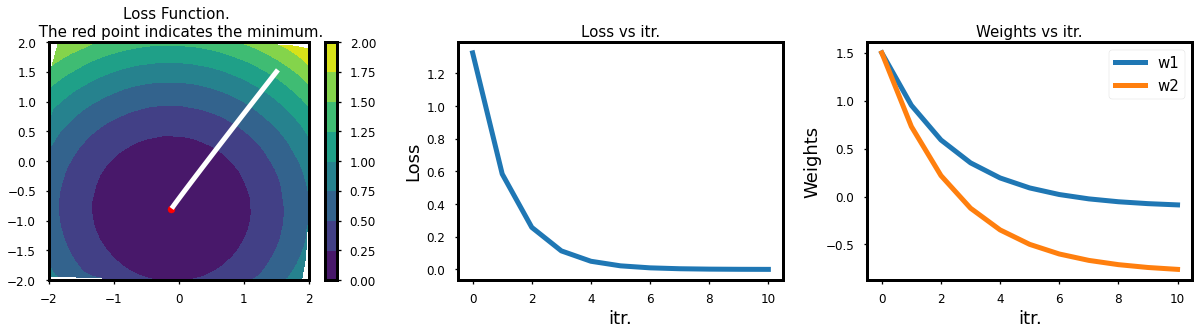

In [73]:
w_gd, hist_gd = GD_optimizer(X,Y, eta=eta0, n_itr=10, warm_start=w_init)

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(1,3,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white')
ax1.scatter(W[0], W[1], color='r', s=50)
plt.colorbar(p1, ax=ax1)
plt.ylim(-2,2)
plt.xlim(-2,2)

ax1 = fig.add_subplot(1,3,2, xlabel='itr.', ylabel='Loss', title='Loss vs itr.')
plt.plot( np.array([l2_loss(y, Y) for y in hist_gd@X.T  ])  )

ax1 = fig.add_subplot(1,3,3, xlabel='itr.', ylabel='Weights', title='Weights vs itr.')
plt.plot(hist_gd.T[0], label='w1'  )
plt.plot(hist_gd.T[1], label='w2'  )
plt.legend(loc=0)

plt.tight_layout()
plt.show()

The initial values of w are [1.5, 1.5].

The final values of w are [0.397 0.677].



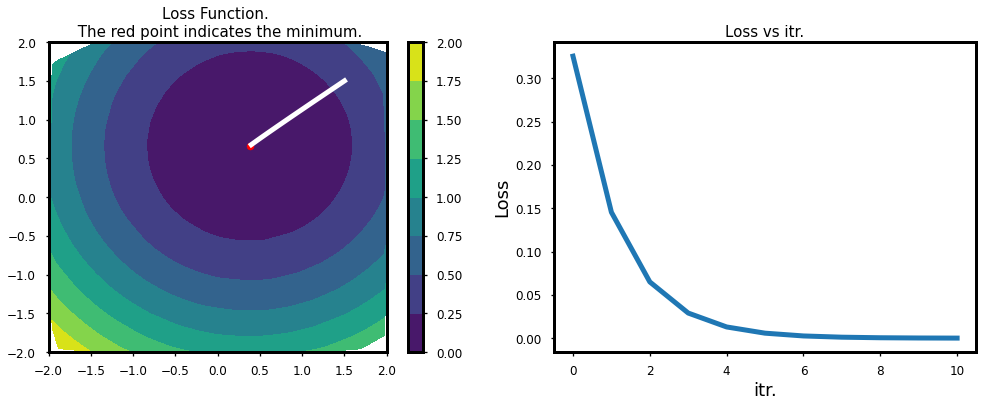

In [19]:
w_gd, hist_gd = GD_optimizer(X,Y, eta=eta0, n_itr=n_itr0, warm_start=w_init)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white')
ax1.scatter(W[0], W[1], color='r', s=50)
plt.colorbar(p1, ax=ax1)
plt.ylim(-2,2)
plt.xlim(-2,2)

ax1 = fig.add_subplot(1,2,2, xlabel='itr.', ylabel='Loss', title='Loss vs itr.')
plt.plot( np.array([l2_loss(y, Y) for y in hist_gd@X.T  ])  )


plt.tight_layout()
plt.show()

Play with the cell above:


*   Set eta to .001 with 100 itr.
*   Set eta to 10 with 100 itr.
*   Set the warm-start to [1000,1000]



## GD with mini_batches

In [69]:
def GD_MB_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10, warm_start = False):
    n_s = len(Y)

    if warm_start==False:
      w = np.random.uniform(-2,2,2)
    else:
      w = warm_start

    w_hist = [w]

    ## It is important to shuffle the data. 
    from sklearn.utils import shuffle
    X, Y = shuffle(X, Y, random_state=0)   
   
    for i in range(n_epoch):
      
        for batch_ind in range(0, int(n_s/batch_size) ):
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
        
            ## We calculate the derivative, but only based on the data in this batch. 
            # dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   )/batch_size
            dw = (x_batch@w - y_batch) @ x_batch /batch_size
            # dw = (X@w - Y) @ X /n_s

            ## and update the w. 
            w = w - eta*dw
            w_hist += [w]
        
    return w, np.array(w_hist)

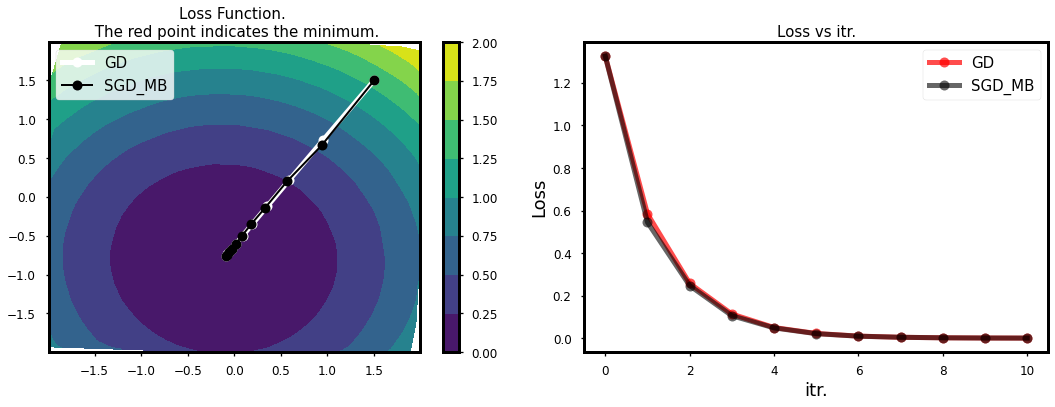

In [76]:
w_sgd, hist_sgd = GD_MB_optimizer(X,Y,eta=eta0, batch_size=1000, n_epoch=1, warm_start=[1.5, 1.5])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white', marker='o',  label = 'GD')
ax1.plot(hist_sgd[:,0],hist_sgd[:,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
# ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

ax1 = fig.add_subplot(1,2,2, xlabel='itr.', ylabel='Loss', title='Loss vs itr.')
plt.plot( np.array([l2_loss(y, Y) for y in hist_gd@X.T  ]) ,  label = 'GD' , marker='o',c='r', alpha=.7)
plt.plot( np.array([l2_loss(y, Y) for y in hist_sgd@X.T  ])  , label = 'SGD_MB', c='black', marker='o', alpha=.6)
plt.legend(loc=0)


plt.tight_layout()


plt.show()

In [75]:
len(X)

10000

The optimal values are [0.39745061 0.67676912].



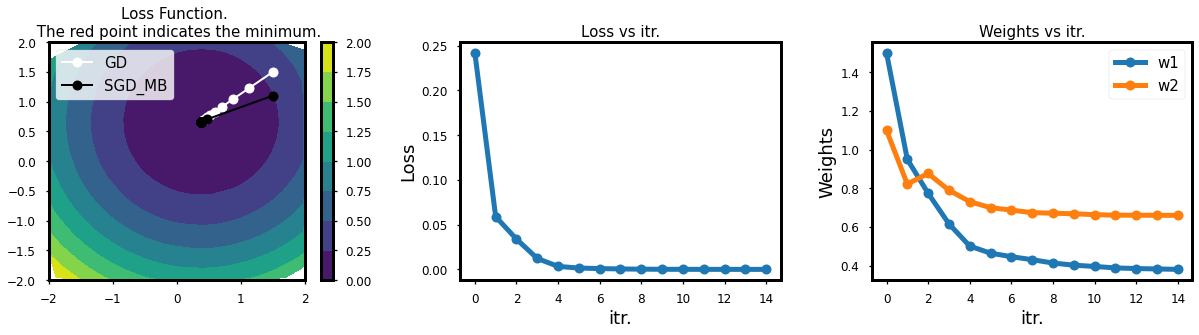

CPU times: user 1.13 s, sys: 218 ms, total: 1.35 s
Wall time: 1.11 s


In [32]:
%%time
w_sgd, hist_sgd = GD_MB_optimizer(X,Y,eta=1, batch_size=20, n_epoch=1, warm_start=[1.5, 1.1])
print(f'The optimal values are {w_gd}.\n')

n_steps=15

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(1,3,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white', marker='o',  label = 'GD', lw=2)
ax1.plot(hist_sgd[::5,0],hist_sgd[::5,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.colorbar(p1, ax=ax1)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend(loc=0)

ax1 = fig.add_subplot(1,3,2, xlabel='itr.', ylabel='Loss', title='Loss vs itr.')
plt.plot( np.array([l2_loss(y, Y) for y in (hist_sgd@X.T)[:n_steps]  ]) , marker='o' )

ax1 = fig.add_subplot(1,3,3, xlabel='itr.', ylabel='Weights', title='Weights vs itr.')
plt.plot(hist_sgd.T[0, :n_steps], label='w1'  , marker='o')
plt.plot(hist_sgd.T[1,:n_steps], label='w2'  , marker='o')
plt.legend(loc=0)

plt.tight_layout()
plt.show()

## Fluctuating gradients

Consider a situation where this converges but wonders around before getting to the optimal point. 

In [53]:
'''
Imagine that in some setting, for the optimization we get the following trail. 
'''
n_point = 20

toy_w_list = np.array([ [.7*W[0]+ 1.2*np.exp(- .1*i), W[1]+np.sin(2*i)*np.exp(- .4*i) ] for i in range(n_point)]).T
toy_w_list.shape

(2, 20)

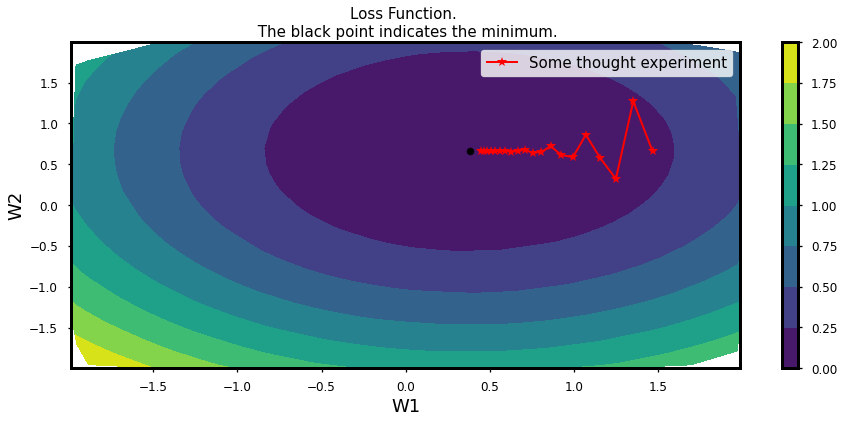

In [54]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The black point indicates the minimum.', xlabel='W1', ylabel='W2')

p1 = ax1.tricontourf(*w_list ,loss_list)
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
# ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white', marker='o',  label = 'GD', lw=2)
# ax1.plot(hist_sgd[::5,0],hist_sgd[::5,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.scatter(W[0], W[1], s=50, color='black')
ax1.plot(toy_w_list[0],toy_w_list[1],linestyle='-', marker='*', color='r', label = 'Some thought experiment', lw = 2)
plt.legend(loc=0)

plt.show()

What's the issue and how can we resolve this?

Clearly, there are some unwanted fluctuations for W_2. This could happen when the lr is too large for one of the parameters. 

Ideally, we would like to have a lr that is smaller for W_2 and maybe larger for W_1. One issue with our optimization technique is that it takes only one lr and applies that to all of the parameters. 

This is one of the reasons that we rescale our input data, to put all the different features are on the same scale. 



One solution is to to track and follow the general trend. 

If there is no fluctuations, we gain momentum and take larger steps. If we are fluctuation too much, then we need to reduce the lr. 

In the next section, we will review one approach to do this. 


## Momentum

### Weighted Average

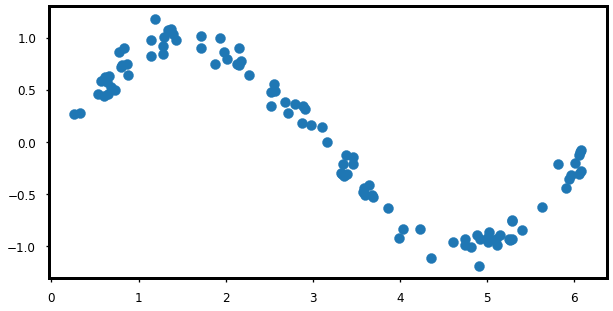

In [ ]:
n_points = 100
X_s = np.sort(np.random.uniform(0,2*np.pi, n_points ))
Y_s = np.sin( X_s ) + np.random.normal(0, .1, n_points)
plt.scatter(X_s, Y_s)

To track the trend, we can look at all of the previous points and make a guess based on them. 

The most basic guess would be to take the average. This would give the following. 

As you can see, it captures the general form of the data, but it is far from perfect.


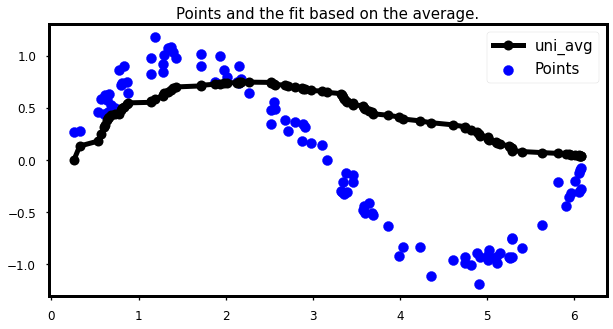

In [ ]:
uni_avg = [ np.sum( Y_s[:i] )/(i+1) for i in range(len(Y_s)  ) ]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, title='Points and the fit based on the average.')

ax1.scatter(X_s, Y_s, color='b',  label = 'Points')
ax1.plot(X_s, uni_avg,linestyle='-', marker='o', color='black', label = 'uni_avg', lw = 5)

plt.legend(loc=0)

plt.show()

The issue is that we are uniformly considering all of the previous points. Intuitively, the more recent points are expected to be more descriptive of the future points. So, instead of a uniform distribution, we use a weighted average that put more emphasis on the more recent points. 

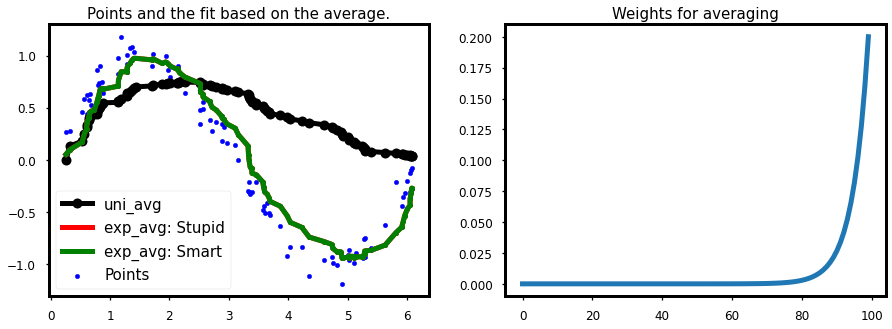

In [ ]:
## We first set the memory coef
beta = .8
## We then make the weights: This is the stupid way
exp_weights = np.array([(beta**t * (1-beta)) for t in range(len(Y_s) )])[::-1]

## And now we multiply the weights and sum them up. 
exp_avg =  [ np.sum( exp_weights[-(i):] * Y_s[:i] ) for i in range(1,len(Y_s)+1  ) ]


### Alternatively, we can do
exp_avg2 = []
last_exp_avg=0
for i in range(len(Y_s) ):
    last_exp_avg = beta*last_exp_avg + (1-beta)*Y_s[i] 
    exp_avg2 += [last_exp_avg]


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1, title='Points and the fit based on the average.')


ax1.scatter(X_s, Y_s, color='b', s=20, label = 'Points')
ax1.plot(X_s, uni_avg,linestyle='-', marker='o', color='black', label = 'uni_avg', lw = 5)
ax1.plot(X_s, exp_avg,linestyle='-', marker='.', color='r', label = 'exp_avg: Stupid', lw = 5)
ax1.plot(X_s, exp_avg2,linestyle='-', marker='.', color='green', label = 'exp_avg: Smart', lw = 5)
plt.legend(loc=0)

ax1 = fig.add_subplot(1,2,2, title='Weights for averaging')
ax1.plot(exp_weights[-100:]) 


plt.show()

## How would this help with the optimization problem?

In [ ]:
def exp_avg(data, beta=.9):
    exp_avg = []
    last_exp_avg = 0 # data[0]
    for i in range(len(data) ):
        last_exp_avg = (beta*last_exp_avg + (1-beta)*data[i] )#/(1-beta**(1*(i+1) ) )
        exp_avg += [last_exp_avg]
       
    return exp_avg

One approach would be to calculate the next step not only based on the derivatives in the current state but using the history. 

In [ ]:
n_point = 200

toy_w_list = np.array([ [.8*W[0]+ .5*np.exp(- .01*i), W[1]+np.sin(2*i)*np.exp(- .04*i) ] for i in range(n_point)]).T
print(toy_w_list.shape)

dw_list = np.array([np.diff(l) for l in toy_w_list ])
dw_expavg_list = np.array([exp_avg(l) for l in dw_list])

new_w_list = np.array( [[ np.sum(l[:ind]) for ind in range(len( dw_expavg_list[0] ))] for l in dw_expavg_list]) + toy_w_list[:,0].reshape(-1,1)

# exp_avg_toy_w_list = [exp_avg(l) for l in toy_w_list]
# exp_avg_toy_w_list[0]

(2, 200)


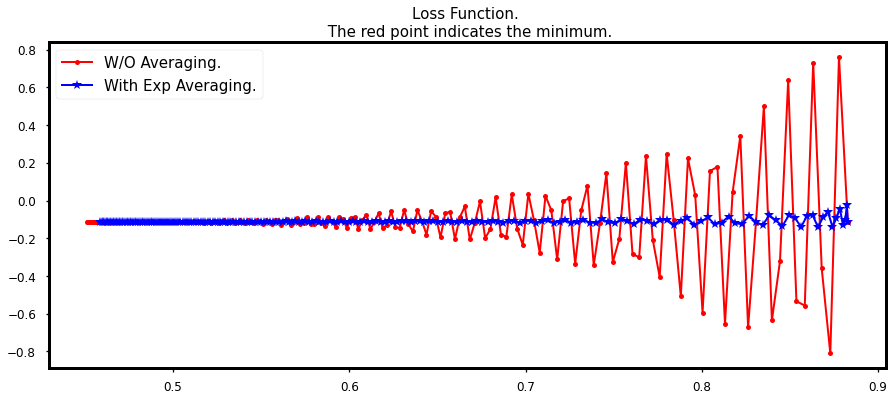

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')
ax1.plot(toy_w_list[0],toy_w_list[1],linestyle='-', marker='.', color='r', label = 'W/O Averaging.', lw = 2)
ax1.plot(new_w_list[0],new_w_list[1],linestyle='-', marker='*', color='b', label = 'With Exp Averaging.', lw = 2)
plt.legend(loc=0)


## RMS

Alternatively, we can calculate the variance (rms) and devide the learning step by that.

In [ ]:
def rms_exp_avg(data, beta=.99):
    var_exp_avg = []
    last_var = 0
    for i in range(len(data) ):
        last_var = (beta*last_var + (1-beta)*data[i]**2 )#/(1-beta**(1*(i+1) ) )
        var_exp_avg += [last_var]
    return var_exp_avg
    

In [ ]:
n_point = 20
eps = 10e-9

toy_w_list = 100*np.array([ [.8*W[0]+ .5*np.exp(- .05*i), W[1]+np.sin(2*i)*np.exp(- .2*i) ] for i in range(n_point)]).T
toy_w_list.shape

dw_list = np.array([np.diff(l) for l in toy_w_list ])
dw_var_list = np.array([rms_exp_avg(l) for l in dw_list])
dw_expavg_list = dw_list/np.sqrt(dw_var_list+eps)

new_w_list = np.array( [[ np.sum(l[:ind]) for ind in range(len( dw_expavg_list[0] ))] for l in dw_expavg_list]) + toy_w_list[:,0].reshape(-1,1)

# exp_avg_toy_w_list = [exp_avg(l) for l in toy_w_list]
# exp_avg_toy_w_list[0]

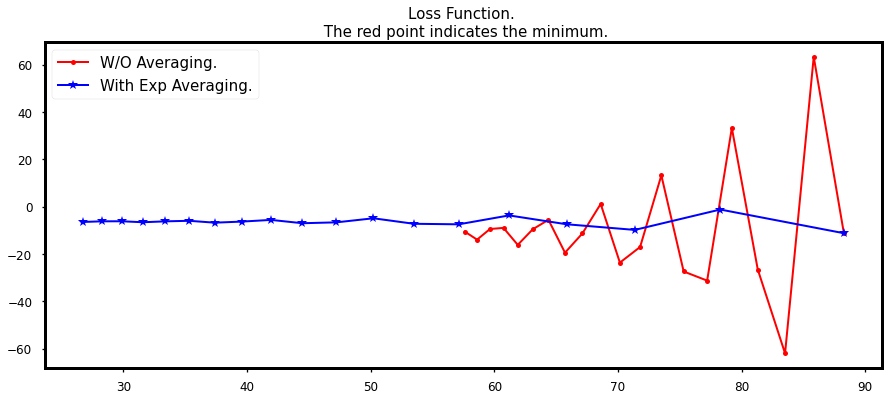

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')
ax1.plot(toy_w_list[0],toy_w_list[1],linestyle='-', marker='.', color='r', label = 'W/O Averaging.', lw = 2)
ax1.plot(new_w_list[0],new_w_list[1],linestyle='-', marker='*', color='b', label = 'With Exp Averaging.', lw = 2)
plt.legend(loc=0)


## Gradient Descent with Momentum 

In [ ]:
def SGD_Momentum_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10, beta=.9):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]
    
    dw = np.zeros(2)
    dw_avg = np.zeros(2)


    from sklearn.utils import shuffle
     
    itr = 0
    for i in range(n_epoch):
        X, Y = shuffle(X, Y, random_state=0)  
        for batch_ind in range(0, int(n_s/batch_size) ):
            itr +=1
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            
            
            ### This is what you need to fill in.
            dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   ) / batch_size
            dw_avg = ( beta * dw_avg + (1-beta) * dw )#/(1-beta**itr) 
            w = w - eta*dw_avg
            w_hist += [w]
        
    return w, np.array(w_hist)

### Test

In [ ]:
w_gdM, hist_gdM = SGD_Momentum_optimizer(X,Y,eta=.03, batch_size=100, n_epoch=10)

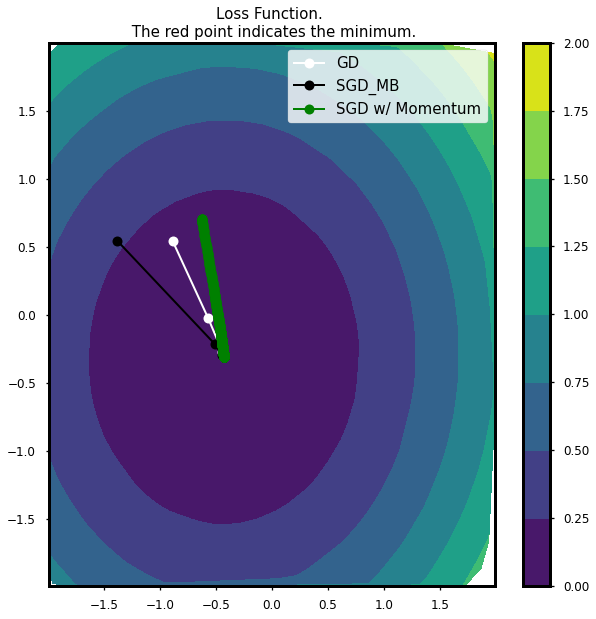

In [ ]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list )
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white', marker='o',  label = 'GD', lw=2)
ax1.plot(hist_sgd[::5,0],hist_sgd[::5,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.plot(hist_gdM[:,0],hist_gdM[:,1],linestyle='-', marker='o', color='green', label = 'SGD w/ Momentum', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

plt.show()

## RMS prop

Alternatively, we can calculate the variance (rms) and devide the learning step by that.

In [ ]:
def rms_exp_avg(data, beta=.99):
    var_exp_avg = []
    last_var = 0
    for i in range(len(data) ):
        last_var = (beta*last_var + (1-beta)*data[i]**2 )#/(1-beta**(1*(i+1) ) )
        var_exp_avg += [last_var]
    return var_exp_avg
    

In [ ]:
def SGD_RMS_optimizer(X, Y, eta=.5, batch_size=100, n_epoch = 10, gamma=.9, eps=.000001):
    n_s = len(Y)
    w = np.random.uniform(-1,1,2)
    w_hist = [w]
    
    dw = np.zeros(2)
    dw_avg2 = np.zeros(2)


    from sklearn.utils import shuffle
     
    itr = 0
    for i in range(n_epoch):
        X, Y = shuffle(X, Y, random_state=0)  
        for batch_ind in range(0, int(n_s/batch_size) ):
            itr +=1
            x_batch = X[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            y_batch = Y[batch_ind*batch_size: min(n_s, (batch_ind+1)*batch_size ) ]
            
            
            ### This is what you need to fill in.
            dw = np.dot( x_batch.T , ( np.dot(x_batch,w) - y_batch)   ) / batch_size
            dw_avg2 = ( beta * dw_avg2 + (1-beta) * dw**2 )#/(1-beta**itr) 
            w = w - eta*dw/np.sqrt(dw_avg2+eps)
            w_hist += [w]
        
    return w, np.array(w_hist)

### Test

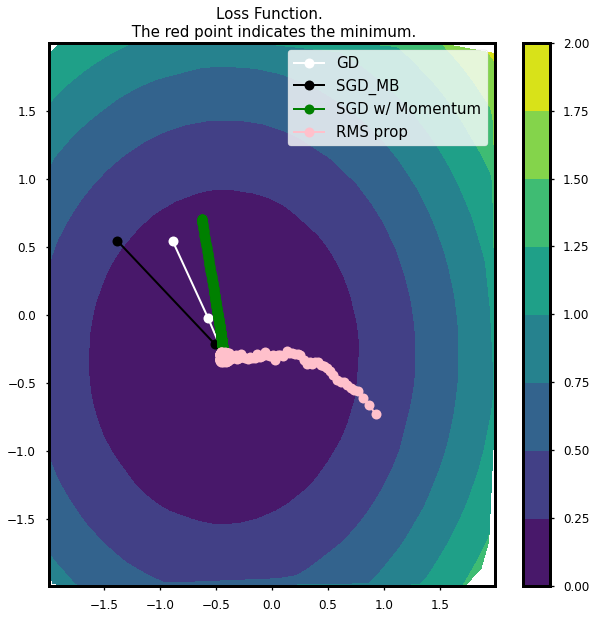

In [ ]:
w_rms, hist_rms = SGD_RMS_optimizer(X,Y,eta=.03, batch_size=100, n_epoch=100)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, title='Loss Function. \n The red point indicates the minimum.')

p1 = ax1.tricontourf(w_list[0], w_list[1] ,loss_list )
plt.colorbar(p1)
# ax1.set_ylim(-.75,.25)
ax1.plot(hist_gd[:,0],hist_gd[:,1], color='white', marker='o',  label = 'GD', lw=2)
ax1.plot(hist_sgd[::5,0],hist_sgd[::5,1],linestyle='-', marker='o', color='black', label = 'SGD_MB', lw = 2)
ax1.plot(hist_gdM[:,0],hist_gdM[:,1],linestyle='-', marker='o', color='green', label = 'SGD w/ Momentum', lw = 2)
ax1.plot(hist_rms[:,0],hist_rms[:,1],linestyle='-', marker='o', color='pink', label = 'RMS prop', lw = 2)
ax1.scatter(W[0], W[1], color='r', s=50)
plt.legend(loc=0)

plt.show()

## Adam

**Question:** Combine the two techniques in one algorithm. 